<img src="../../images/wt4.png" align="right" width="70"/>

  #     Notebook for Comparing Early Gear Fault Development Across Turbines 



## Table of contents
1. Load All signal
2. Load Resample Signal (Order Domain)
3. Turbine 1 and 2: Development of the First 15 Orders
4. Development of the First 200 Orders
5. All Orders
6. Envlope Plotting

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
%load_ext autoreload

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
from scipy.stats import kurtosis, skew

ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff


appended
appended
appended
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


## 1. Load All Signals

In [4]:
all_vib_signals = []
all_peak_array  = []
all_avg_rpm     = []
all_avg_power   = []
all_dates       = []

all_resampled_x = []
all_resampled_y = []
turbines = ['wt01', 'wt02', 'wt03', 'wt04']

In [5]:
for i in range(4):
    turbine = turbines[i]
    vib_signal, times, op_data_intervals, peak_array = load_raw_signals.load_raw('gearbox',turbine)
    avg_rpm = np.asarray(op_data_intervals['AvgSpeed'])
    avg_power = np.asarray(op_data_intervals['AvgPower'])
    time = times[0]

    wt_folder_path = f'/Volumes/OsvikExtra/signal_data/raw_data/gearbox/{turbine}/'
    dates = pd.read_csv(f'{wt_folder_path}interval_dates_{turbine}.csv')
    dates = dates.drop(columns=['Unnamed: 0'])
    
    all_vib_signals.append(vib_signal)
    all_peak_array.append(peak_array)
    all_avg_rpm.append(avg_rpm)
    all_avg_power.append(avg_power)
    all_dates.append(dates)


File exist
File exist
File exist
File exist


## 2. Load Resample Signal (Order Domain)

In [6]:

for i in range(len(turbines)):
    print(f'Loading {turbines[i]}\n')
    resampled_wt_path = f'../../../../../../signal_data/resampled_order/gearbox/{turbines[i]}/'
    num_csvs = len([f for f in os.listdir(resampled_wt_path) 
         if f.endswith('.csv.zip') and os.path.isfile(os.path.join(resampled_wt_path, f)) and f[0]=='r'])

    resampled_x = []
    resampled_y = []

    for i in range(num_csvs):

        save_path = f'{resampled_wt_path}resampled_order_20000_{i}.csv.zip'
        df = pd.read_csv(f'{resampled_wt_path}resampled_order_20000_{i}.csv.zip', compression='gzip')
        resampled_x.append(df['order'].values)
        resampled_y.append(df['y'].values)
        print(f'Loading {i+1} / {num_csvs}', end='\r')
    
    all_resampled_x.append(resampled_x)
    all_resampled_y.append(resampled_y)
    

Loading wt01

Loading wt02/ 410

Loading wt03/ 419

Loading wt04/ 415



## 3. Turbine 1 and 2: Development of the First 15 Orders

In [7]:
def normalise_fft(fft):
    N = fft.shape[0]
    y = np.abs(fft)[:N // 2] * 1 / N  # Normalized
    return y

In [8]:
def flip_date(date):
    splitted_date = date.split('-')
    year  = splitted_date[0]
    month = splitted_date[1]
    day   = splitted_date[2].split(' ')[0]
    time  = splitted_date[2].split(' ')[1]
    new_date = day + '.' + month + '.' + year + ' ' + time
    return new_date

In [10]:
intervals_wt01 = [3, 98, 204, 301, 407]
intervals_wt02 = [7, 101, 213, 293, 413]
intervals_wt03 = [1, 102, 199, 301, 411]
intervals_wt04 = [4, 102, 198, 306, 423]
all_intervals = [intervals_wt01, intervals_wt02, intervals_wt03, intervals_wt04]

all_plot_x = []
all_plot_y = []

for turbine, intervals in enumerate(all_intervals):
    plot_x = []
    plot_y = []
    
    for i in intervals:
        dato = flip_date(all_dates[turbine].values[i][0])
        title = f'Order Analysis of {turbines[turbine]}  interval={i}    Date:  {dato}\n'
        fft,freq = plotting_methods.plot_fft(all_resampled_x[turbine][i], all_resampled_y[turbine][i], x_max=15, y_max=0.5, avg_rpm=all_avg_rpm[turbine][i], avg_power=all_avg_power[turbine][i], name=title, default_title=False)
        fft = normalise_fft(fft)
        plot_x.append(freq)
        plot_y.append(fft)
    
    all_plot_x.append(plot_x)
    all_plot_y.append(plot_y)


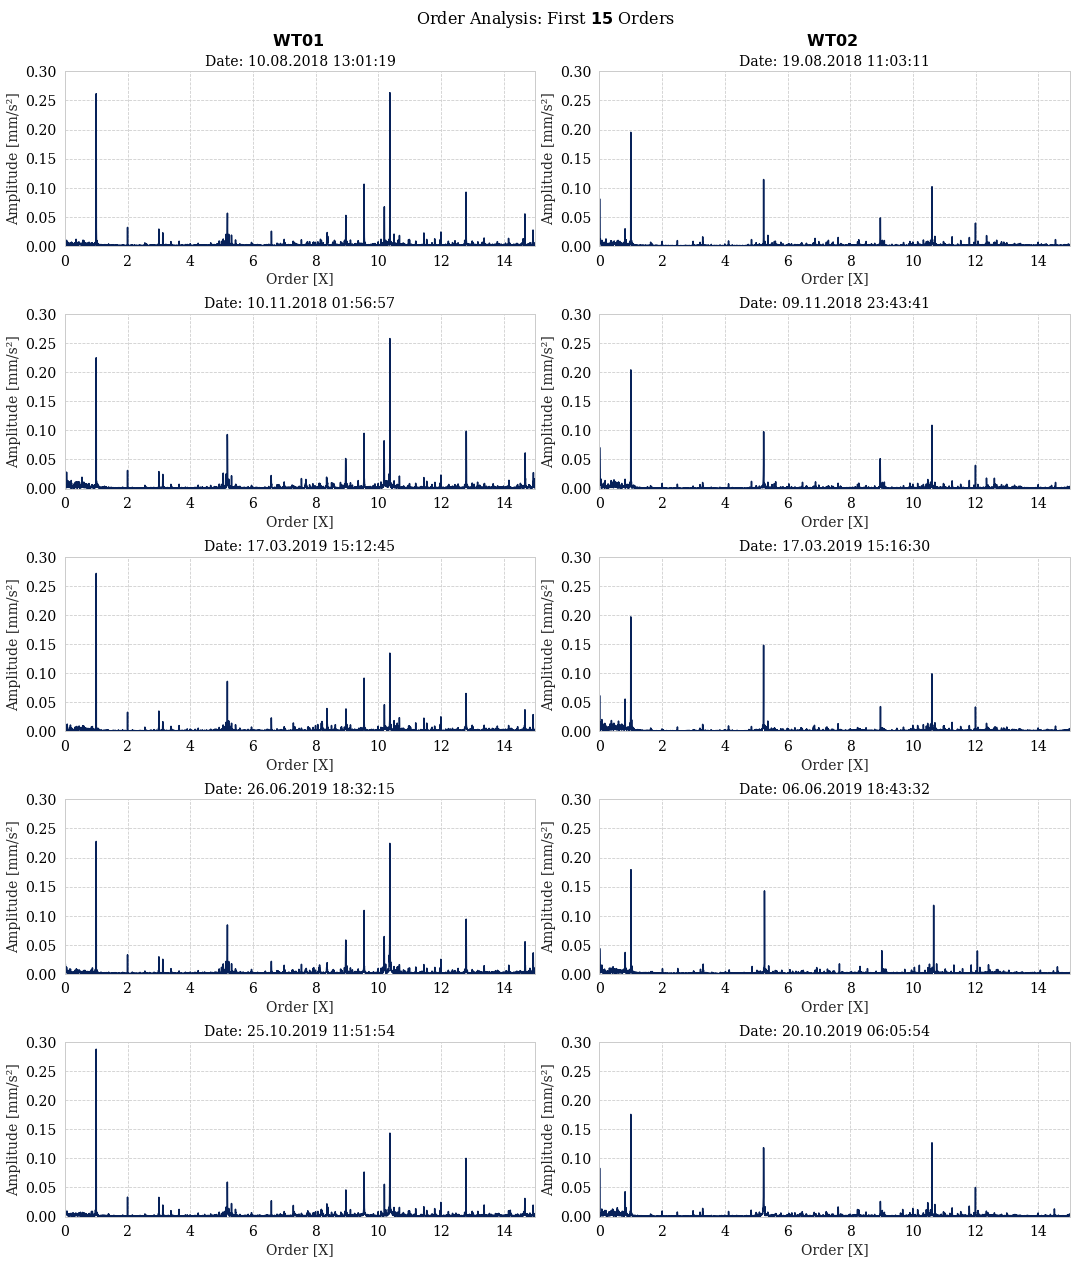

In [11]:
plot_path = f'../../plots/results/'

rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Order Analysis: First '+ r"$\bf{15}$" + ' Orders'
heading += '\n\t' + r"$\bf{WT01}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT02}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.03)
for col in range(cols):
    turbine = col
    
    for row in range(rows):
        interval = all_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_plot_x[turbine][row], all_plot_y[turbine][row])
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 15)
        ax[row,col].set_ylim(0, 0.3)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}15_order_analysis_wt01_wt02.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


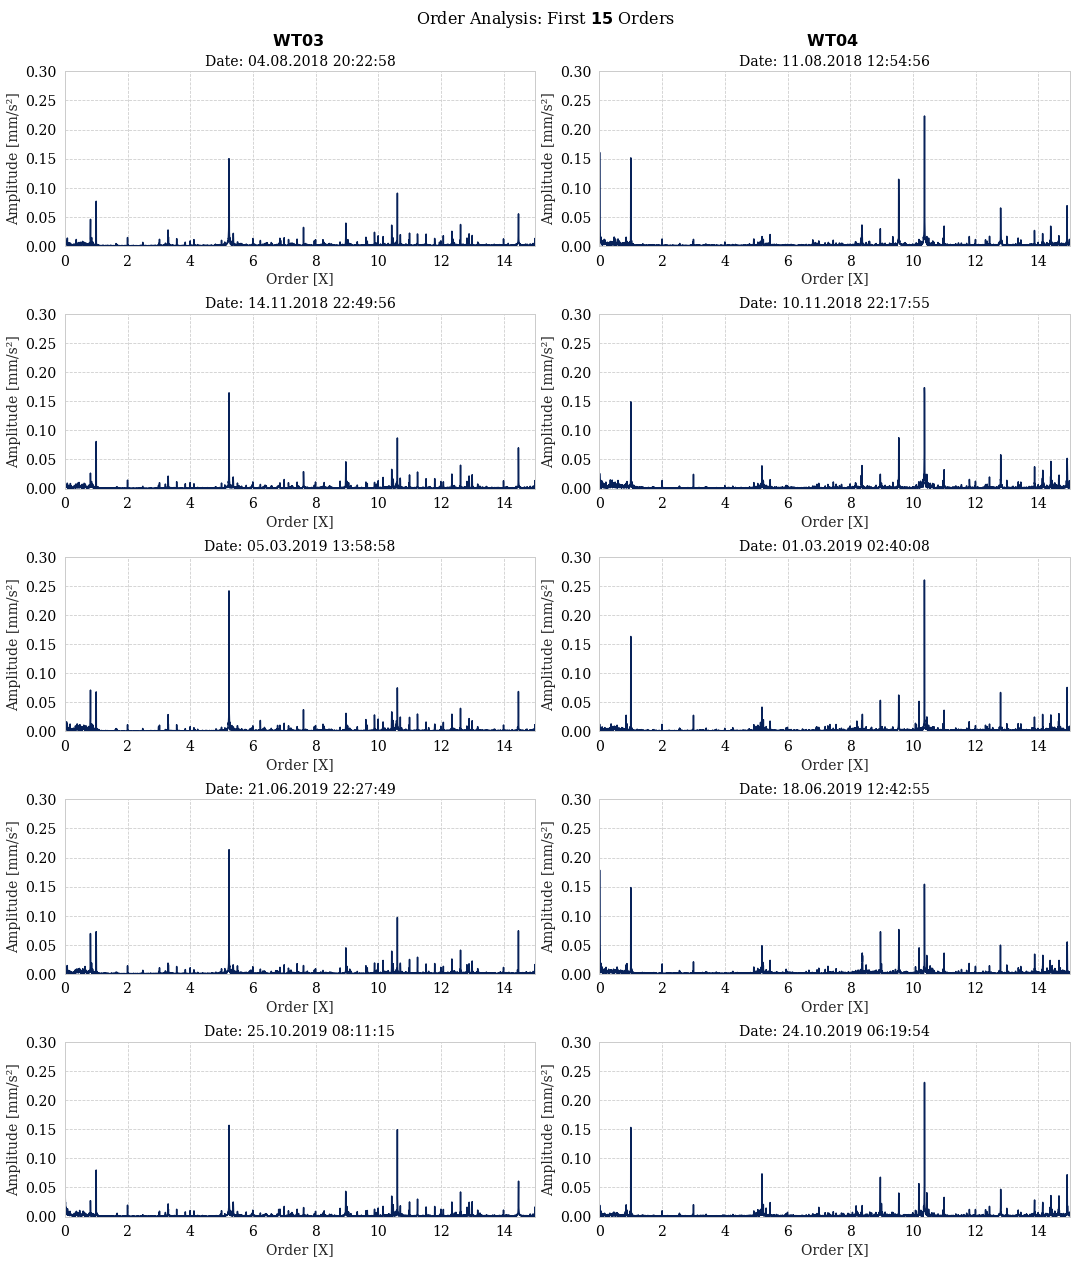

In [12]:
rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Order Analysis: First '+ r"$\bf{15}$" + ' Orders'
heading += '\n\t' + r"$\bf{WT03}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT04}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.03)

for col in range(cols):
    turbine = col + 2
    
    for row in range(rows):
        interval = all_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_plot_x[turbine][row], all_plot_y[turbine][row])
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 15)
        ax[row,col].set_ylim(0, 0.3)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}15_order_analysis_wt03_wt04.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


## 4. Development of the First 200 Orders

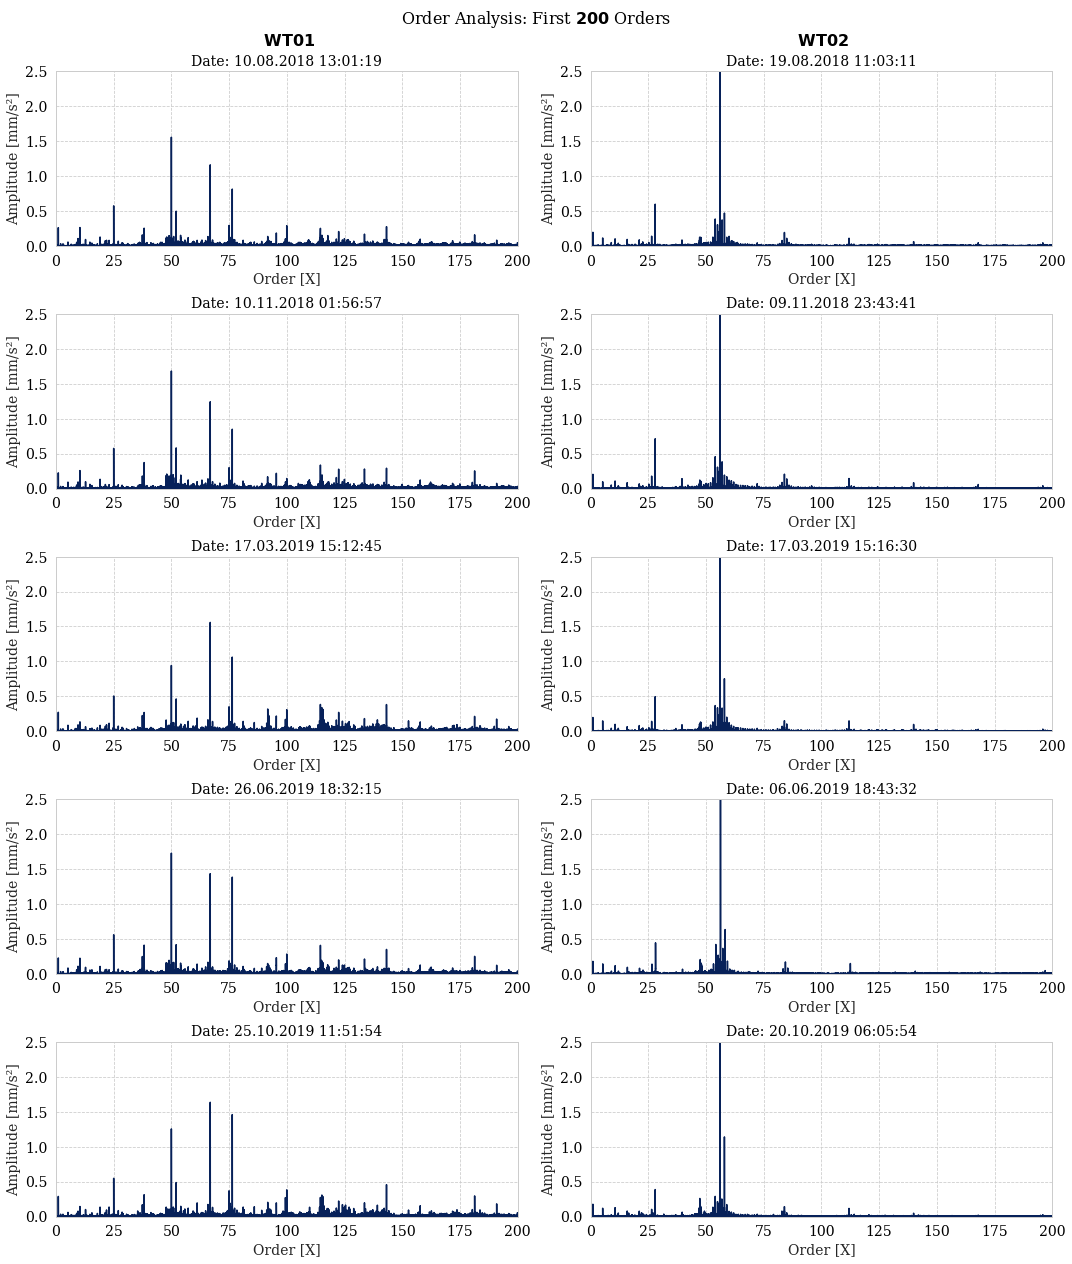

In [13]:
rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Order Analysis: First '+ r"$\bf{200}$" + ' Orders'
heading += '\n\t' + r"$\bf{WT01}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT02}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.03)

for col in range(cols):
    turbine = col
    
    for row in range(rows):
        interval = all_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_plot_x[turbine][row], all_plot_y[turbine][row])
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 200)
        ax[row,col].set_ylim(0, 2.5)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}200_order_analysis_wt01_wt02.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


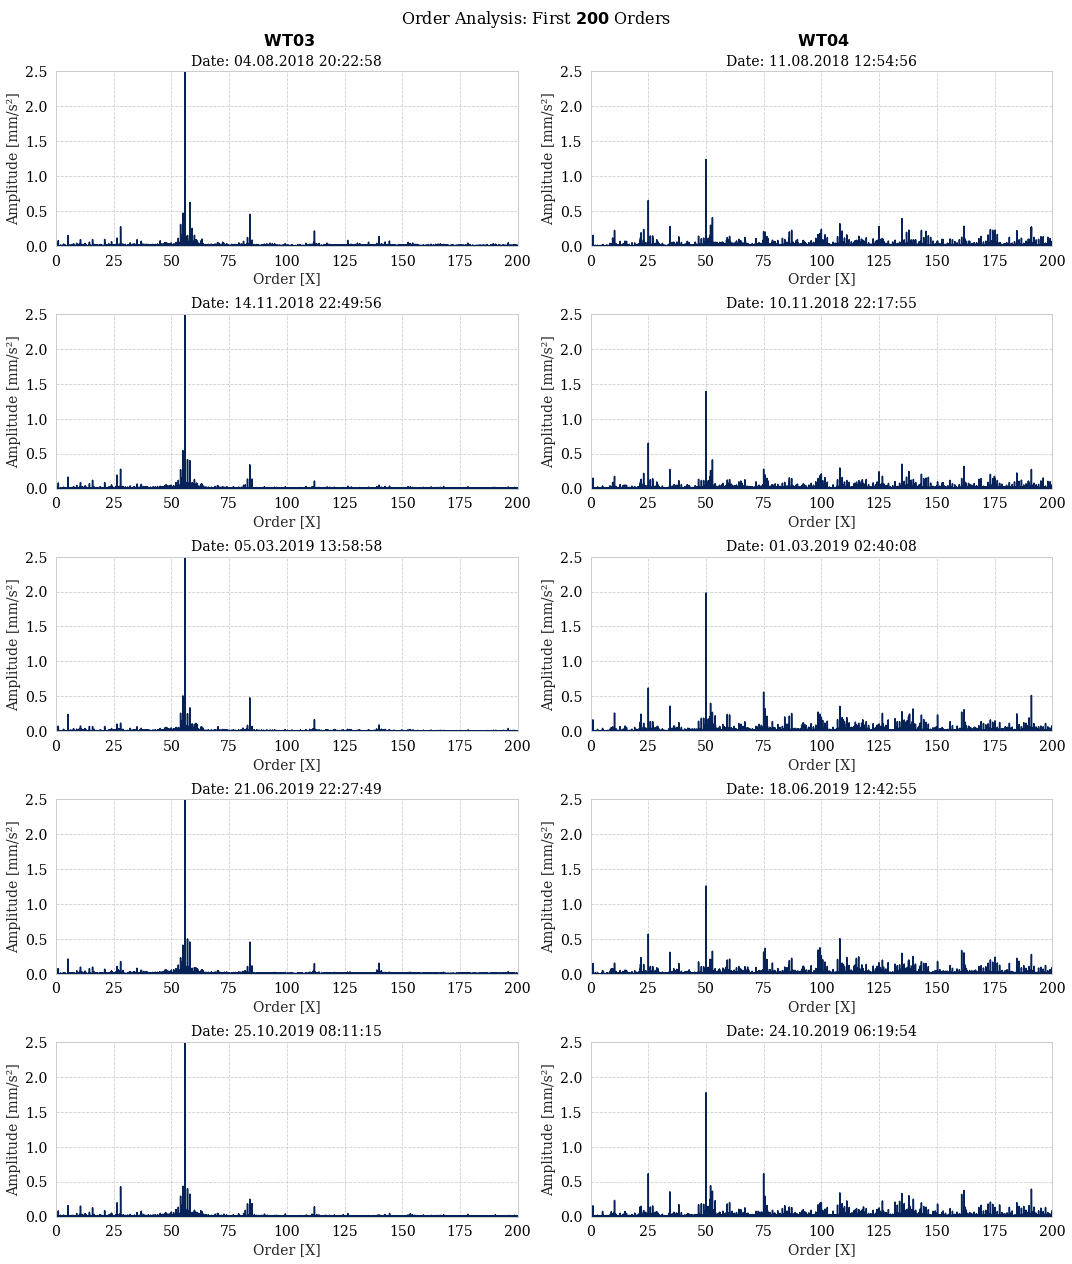

In [14]:
rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Order Analysis: First '+ r"$\bf{200}$" + ' Orders'
heading += '\n\t' + r"$\bf{WT03}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT04}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.03)

for col in range(cols):
    turbine = col + 2
    
    for row in range(rows):
        interval = all_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_plot_x[turbine][row], all_plot_y[turbine][row])
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 200)
        ax[row,col].set_ylim(0, 2.5)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}200_order_analysis_wt03_wt04.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


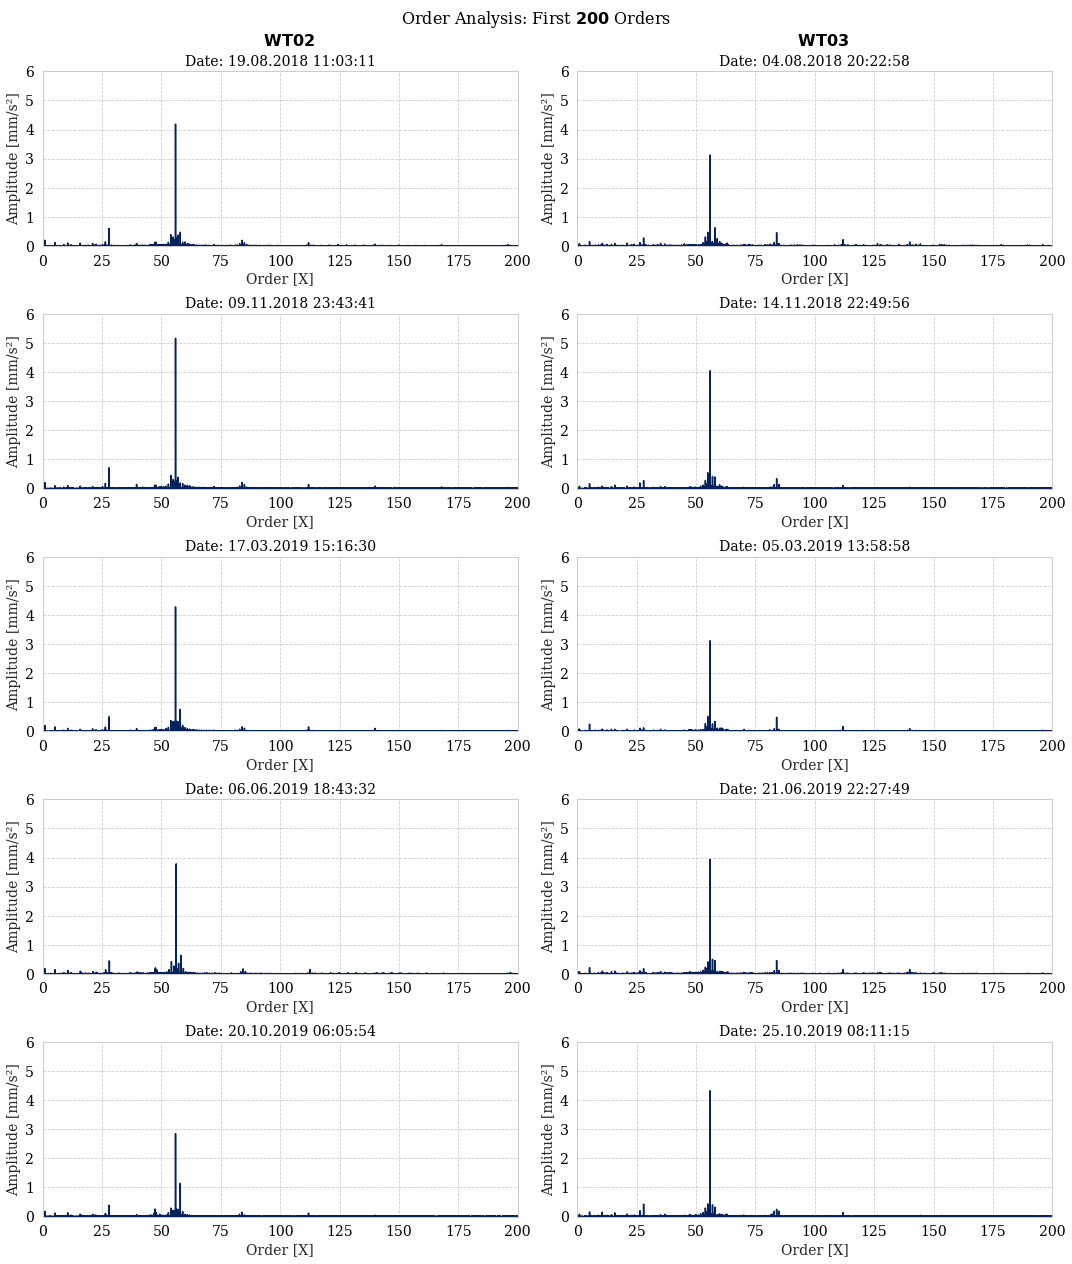

In [20]:
rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Order Analysis: First '+ r"$\bf{200}$" + ' Orders'
heading += '\n\t' + r"$\bf{WT02}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT03}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.03)

for col in range(cols):
    turbine = col+1
    
    for row in range(rows):
        interval = all_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_plot_x[turbine][row], all_plot_y[turbine][row])
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 200)
        ax[row,col].set_ylim(0, 6)


plt.tight_layout()
plt.margins(0)
plt.savefig(f'{plot_path}200_order_analysis_wt02_wt03.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


## 5. All Orders

In [ ]:
rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Order Analysis: '+ r"$\bf{All}$" + ' Orders'
heading += '\n\t' + r"$\bf{WT01}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT02}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.03)

for col in range(cols):
    turbine = col
    
    for row in range(rows):
        interval = all_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_plot_x[turbine][row], all_plot_y[turbine][row])
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 500)
        ax[row,col].set_ylim(0, 2.5)


plt.tight_layout()
plt.margins(0)
plt.savefig(f'{plot_path}all_orders_analysis_wt01_wt02.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


In [ ]:
rows = 5
cols = 2

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Order Analysis: '+ r"$\bf{All}$" + ' Orders'
heading += '\n\t' + r"$\bf{WT03}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT04}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.03)

for col in range(cols):
    turbine = col +2
    
    for row in range(rows):
        interval = all_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_plot_x[turbine][row], all_plot_y[turbine][row])
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 500)
        ax[row,col].set_ylim(0, 2.5)


plt.tight_layout()
plt.margins(0)
plt.savefig(f'{plot_path}all_orders_analysis_wt03_wt04.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


## 6. Envlope Plotting

### Narrowband cf 9400, bw 6400

In [12]:
all_ffts  = []
all_freqs = []
all_interesting_intervals = []

for turbine in turbines:
    path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/higfreq.npz'
    load = np.load(path,allow_pickle=True)
    all_ffts.append(load['fft'])
    all_freqs.append(load['freq'])
    all_interesting_intervals.append(load['intervals'])

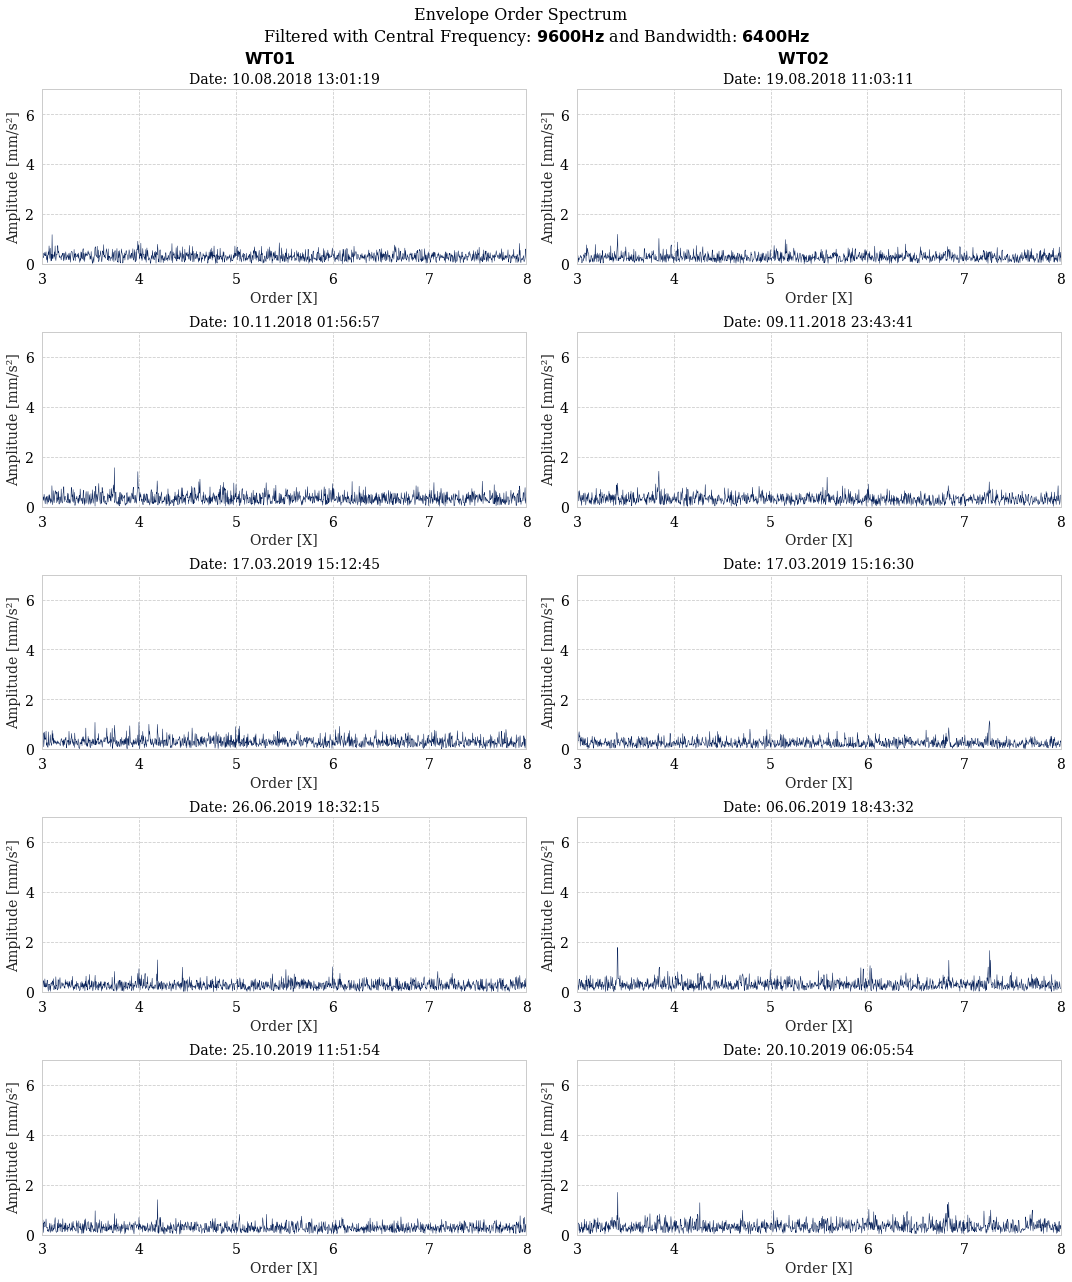

In [16]:
rows = 5
cols = 2
plot_path = f'../../plots/envelope_order_higher_freq/'

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Envelope Order Spectrum      ' + '\nFiltered with Central Frequency: ' + r"$\bf{9600Hz}$" + ' and Bandwidth: '+ r"$\bf{6400Hz}$"
heading += '\n' + r"$\bf{WT01}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT02}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.045)

for col in range(cols):
    turbine = col
    
    for row in range(rows):
        interval = all_interesting_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_freqs[turbine][row], all_ffts[turbine][row], linewidth= 0.5)
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(3, 8)
        ax[row,col].set_ylim(0, 7)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}high_freq_envelope_wt01_wt02.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


In [ ]:
rows = 5
cols = 2
plot_path = f'../../plots/envelope_order_higher_freq/'

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Envelope Order Spectrum      ' + '\nFiltered with Central Frequency: ' + r"$\bf{9600Hz}$" + ' and Bandwidth: '+ r"$\bf{6400Hz}$"
heading += '\n' + r"$\bf{WT03}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT04}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.045)

for col in range(cols):
    turbine = col+2
    
    for row in range(rows):
        interval = all_interesting_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_freqs[turbine][row], all_ffts[turbine][row], linewidth= 0.5)
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 30)
        ax[row,col].set_ylim(0, 7)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}high_freq_envelope_wt03_wt04.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


### High-pass filter 2500Hz cutoff

In [ ]:
all_ffts  = []
all_freqs = []
all_interesting_intervals = []

for turbine in turbines:
    path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/high_pass_2500_.npz'
    load = np.load(path,allow_pickle=True)
    all_ffts.append(load['fft'])
    all_freqs.append(load['freq'])
    all_interesting_intervals.append(load['intervals'])

In [ ]:
rows = 5
cols = 2
plot_path = f'../../plots/envelope_order_2500/'

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Envelope Order Spectrum      ' + '\nHigh-pass Filtered, Cuttoff Frequency: ' + r"$\bf{2500Hz}$"
heading += '\n' + r"$\bf{WT01}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT02}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.045)

for col in range(cols):
    turbine = col
    
    for row in range(rows):
        interval = all_interesting_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_freqs[turbine][row], all_ffts[turbine][row], linewidth= 1)
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 2)
        ax[row,col].set_ylim(0, 7)


plt.tight_layout()
plt.margins(0)
plt.savefig(f'{plot_path}high_pass_2orders_wt01_wt02.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


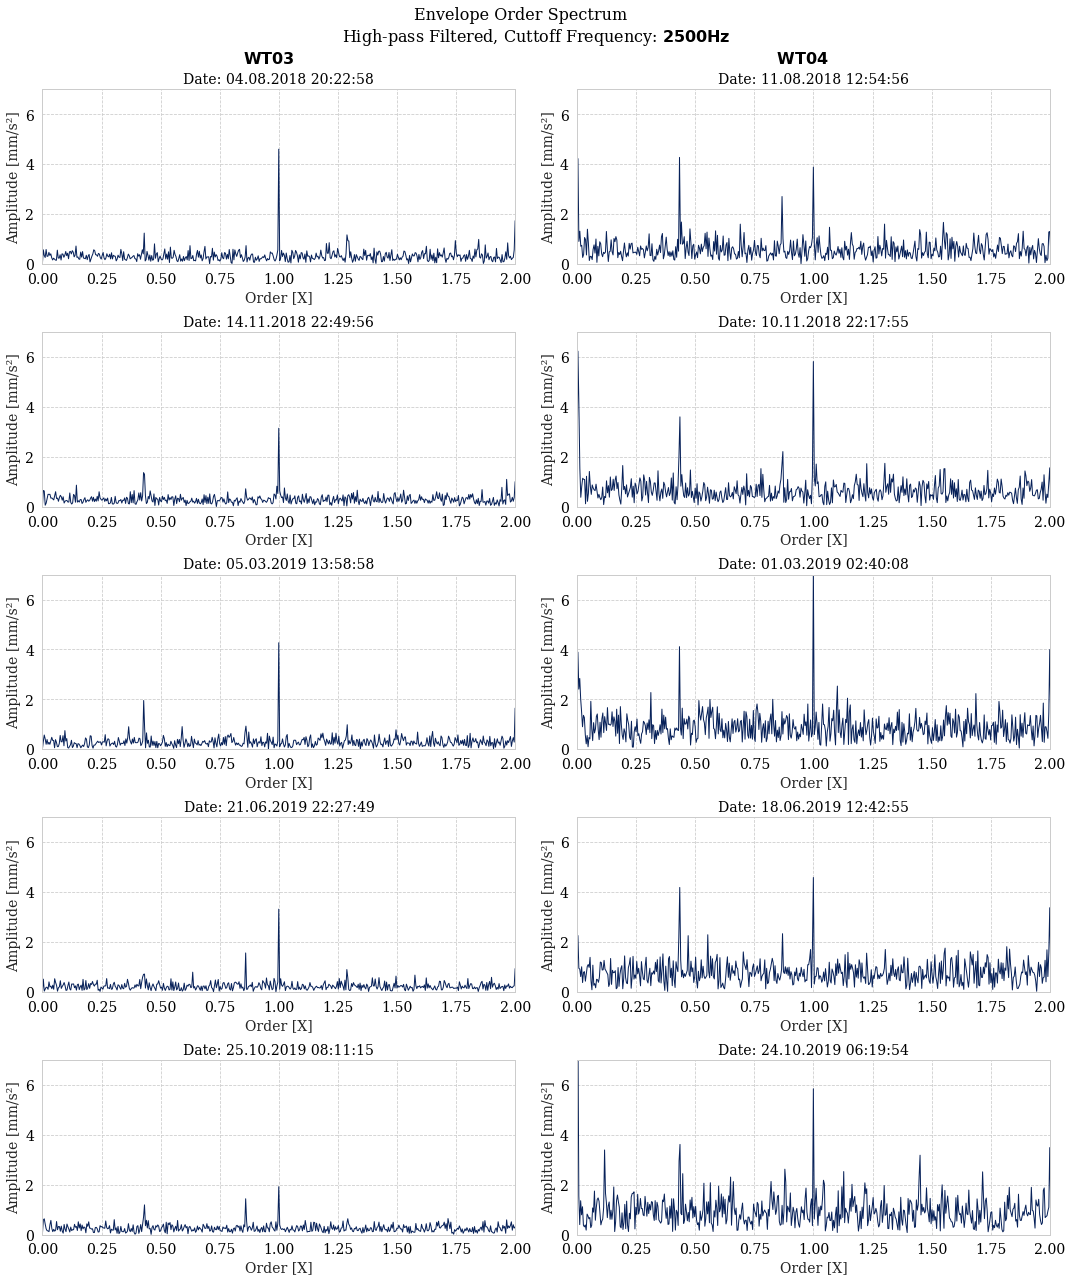

In [55]:
rows = 5
cols = 2
plot_path = f'../../plots/envelope_order_2500/'

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Envelope Order Spectrum      ' + '\nHigh-pass Filtered, Cuttoff Frequency: ' + r"$\bf{2500Hz}$"
heading += '\n' + r"$\bf{WT03}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT04}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.045)

for col in range(cols):
    turbine = col+2
    
    for row in range(rows):
        interval = all_interesting_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_freqs[turbine][row], all_ffts[turbine][row], linewidth= 1)
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 2)
        ax[row,col].set_ylim(0, 7)


plt.tight_layout()
plt.margins(0)
plt.savefig(f'{plot_path}high_pass_2orders_wt03_wt04.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


### Manually Selected Frequency Bands for WT01 and WT02

In [127]:
all_ffts  = []
all_freqs = []
all_interesting_intervals = []

turbine = 'wt01'
path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/cf_6425_bw_50.npz'
load = np.load(path,allow_pickle=True)
all_ffts.append(load['fft'])
all_freqs.append(load['freq'])
all_interesting_intervals.append(load['intervals'])

turbine = 'wt02'
path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/cf_7500_bw_50.npz'
load = np.load(path,allow_pickle=True)
all_ffts.append(load['fft'])
all_freqs.append(load['freq'])
all_interesting_intervals.append(load['intervals'])



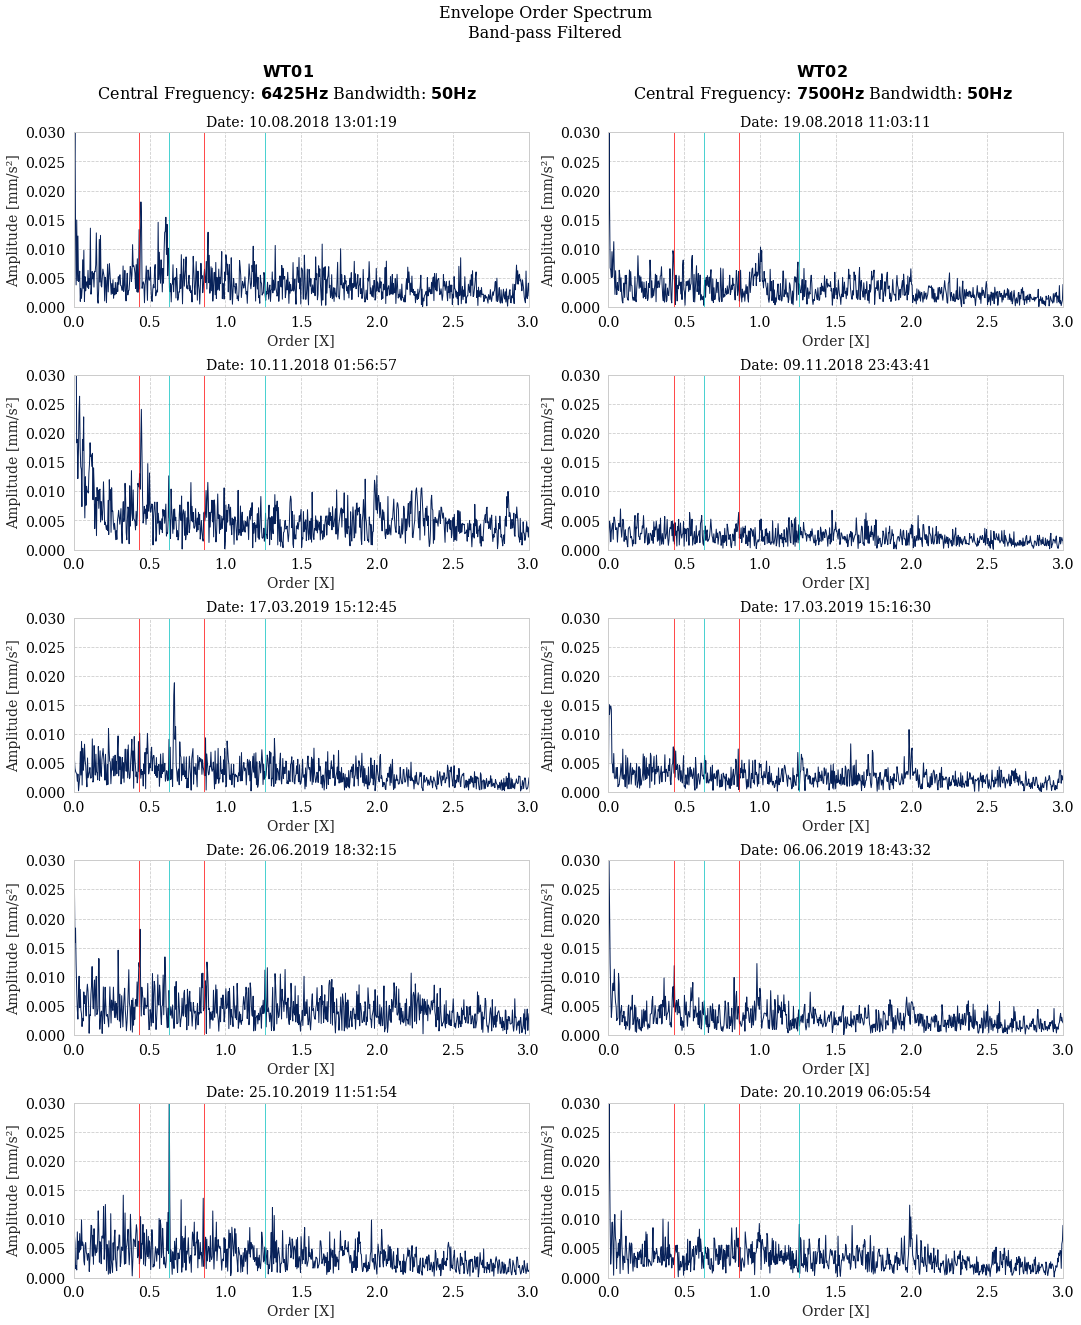

In [133]:
rows = 5
cols = 2
plot_path = f'../../plots/envelope_manual_freqs/'

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Envelope Order Spectrum' + '\nBand-pass Filtered'+'\n'
heading += '\n    ' + r"$\bf{WT01}$" + '\t\t\t\t\t\t\t\t\t\t\t\t      ' + r"$\bf{WT02}$" 
heading += '\n    Central Freguency: ' + r"$\bf{6425Hz}$" + ' Bandwidth: ' r"$\bf{50Hz}$" + '\t\t\t\t  ' 
heading += 'Central Freguency: ' + r"$\bf{7500Hz}$"+ ' Bandwidth: ' r"$\bf{50Hz}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.08)

for col in range(cols):
    turbine = col
    
    for row in range(rows):
        interval = all_interesting_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_freqs[turbine][row], all_ffts[turbine][row], linewidth= 1)
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 3)
        ax[row,col].set_ylim(0, 0.03)
        ax[row,col].axvline(0.43, c='r', linewidth=0.7)
        ax[row,col].axvline(0.86, c='r', linewidth=0.7)
        ax[row,col].axvline(0.63, c='c', linewidth=0.7)
        ax[row,col].axvline(1.26, c='c', linewidth=0.7)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}manual_wt01_wt02.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


### Manually Selected Frequency Bands for WT03 and WT04 PART 1

In [134]:
all_ffts  = []
all_freqs = []
all_interesting_intervals = []

turbine = 'wt03'
path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/cf_6125_bw_50.npz'
load = np.load(path,allow_pickle=True)
all_ffts.append(load['fft'])
all_freqs.append(load['freq'])
all_interesting_intervals.append(load['intervals'])

turbine = 'wt04'
path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/cf_6625_bw_50.npz'
load = np.load(path,allow_pickle=True)
all_ffts.append(load['fft'])
all_freqs.append(load['freq'])
all_interesting_intervals.append(load['intervals'])



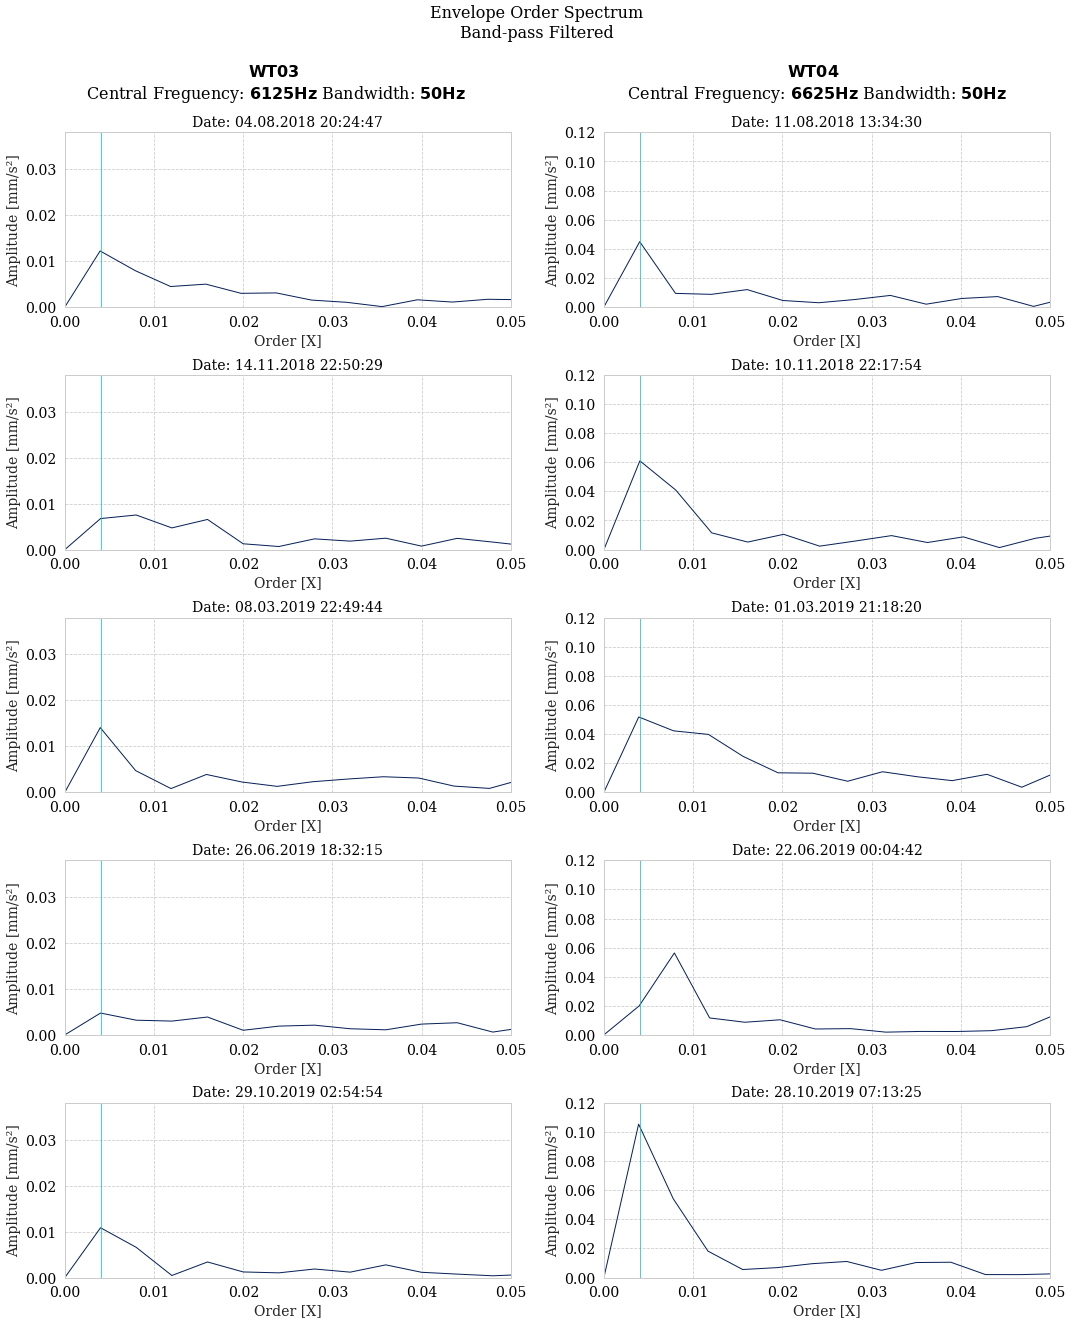

In [144]:
rows = 5
cols = 2
plot_path = f'../../plots/envelope_manual_freqs/'

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Envelope Order Spectrum' + '\nBand-pass Filtered'+'\n'
heading += '\n   ' + r"$\bf{WT03}$" + '\t\t\t\t\t\t\t\t\t\t\t\t      ' + r"$\bf{WT04}$" 
heading += '\n    Central Freguency: ' + r"$\bf{6125Hz}$" + ' Bandwidth: ' r"$\bf{50Hz}$" + '\t\t\t\t  ' 
heading += ' Central Freguency: ' + r"$\bf{6625Hz}$"+ ' Bandwidth: ' r"$\bf{50Hz}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.08)

for col in range(cols):
    turbine = col
    for row in range(rows):
        interval = all_interesting_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_freqs[turbine][row], all_ffts[turbine][row], linewidth= 1)
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        ax[row,col].set_xlim(0, 0.05)
        if col == 0:
            ax[row,col].set_ylim(0, 0.038)
        else:
            ax[row,col].set_ylim(0, 0.12)
        ax[row,col].axvline(0.004, c='c', linewidth=0.7)
#        ax[row,col].axvline(0.86, c='c', linewidth=0.7)


plt.tight_layout()
plt.margins(0)
#plt.savefig(f'{plot_path}manual_narrow_wt03_wt04.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()


### Manually Selected Frequency Bands for WT03 and WT04 PART 2

In [50]:
all_ffts  = []
all_freqs = []
all_interesting_intervals = []

turbine = 'wt03'
path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/cf_4500_bw_1500.npz'
load = np.load(path,allow_pickle=True)
all_ffts.append(load['fft'])
all_freqs.append(load['freq'])
all_interesting_intervals.append(load['intervals'])

turbine = 'wt04'
path = f'/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/{turbine}/cf_8200_bw_800.npz'
load = np.load(path,allow_pickle=True)
all_ffts.append(load['fft'])
all_freqs.append(load['freq'])
all_interesting_intervals.append(load['intervals'])



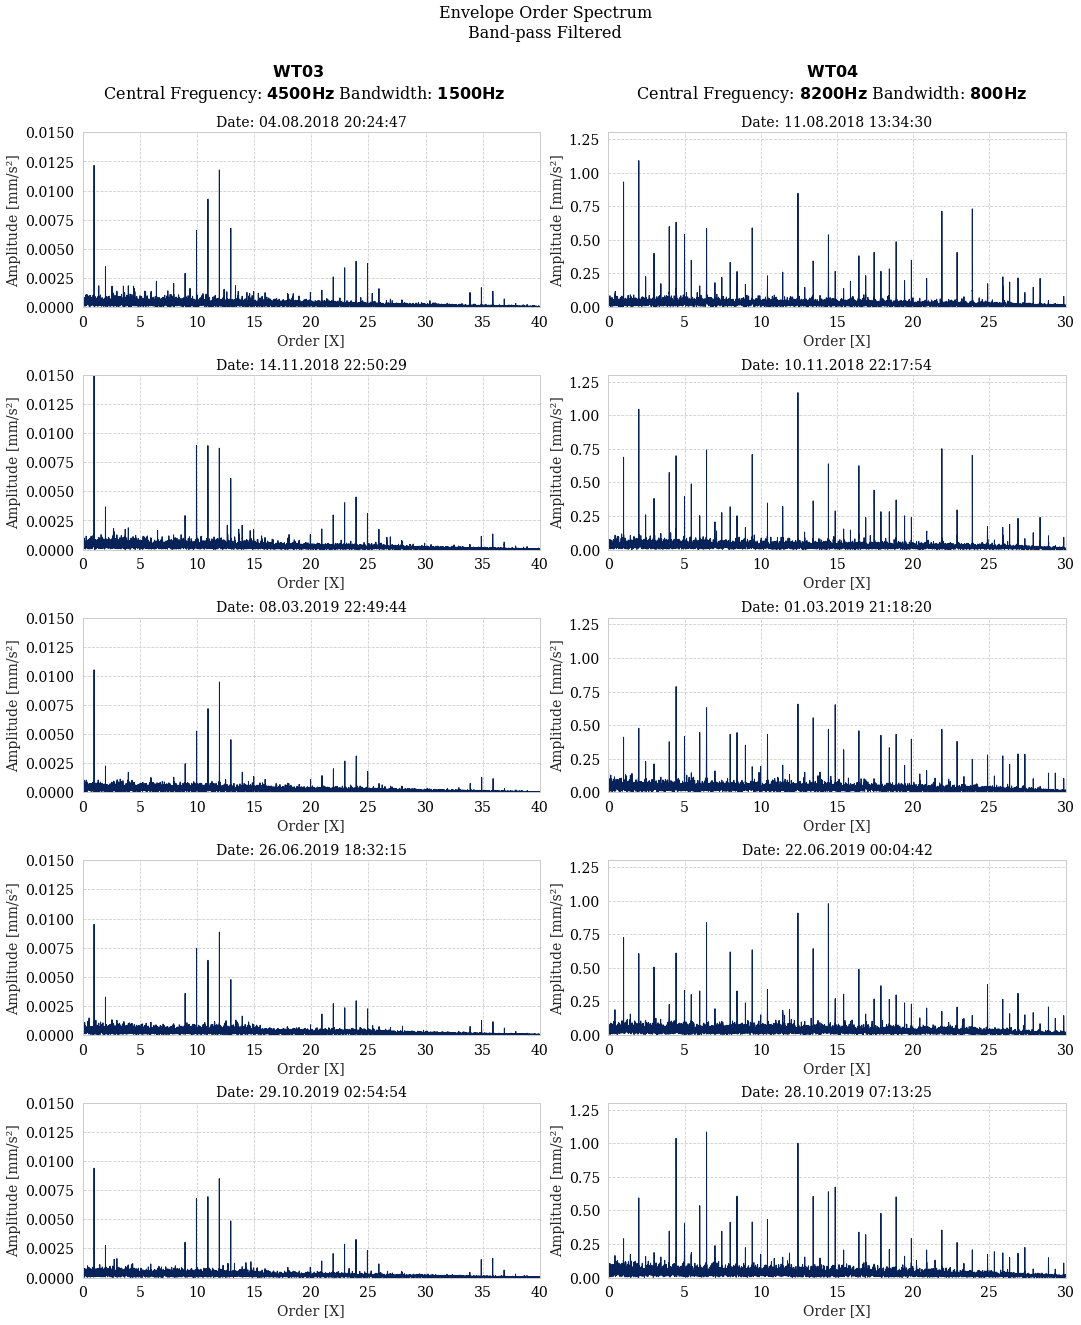

In [51]:
rows = 5
cols = 2
plot_path = f'../../plots/envelope_manual_freqs/'

fig, ax = plt.subplots(rows, cols,figsize=(15,17))
heading = 'Envelope Order Spectrum' + '\nBand-pass Filtered'+'\n'
heading += '\n\t' + r"$\bf{WT03}$" + '\t\t\t\t\t\t\t\t\t\t\t\t  ' + r"$\bf{WT04}$" 
heading += '\n\tCentral Freguency: ' + r"$\bf{4500Hz}$" + ' Bandwidth: ' r"$\bf{1500Hz}$" + '\t\t\t  ' 
heading += ' Central Freguency: ' + r"$\bf{8200Hz}$"+ ' Bandwidth: ' r"$\bf{800Hz}$"
my_suptitle = fig.suptitle(heading,fontsize=16, y=1.08)

for col in range(cols):
    turbine = col
    for row in range(rows):
        interval = all_interesting_intervals[turbine][row]
        dato = flip_date(all_dates[turbine].values[interval][0])
        ax[row,col].plot(all_freqs[turbine][row], all_ffts[turbine][row], linewidth= 1)
        ax[row,col].set_title(f"Date: {dato}")
        ax[row,col].set_ylabel("Amplitude [mm/s\u00b2]")
        ax[row,col].set_xlabel("Order [X]")
        if col == 0:
            ax[row,col].set_xlim(0, 40)
            ax[row,col].set_ylim(0, 0.015)
        else:
            ax[row,col].set_xlim(0, 30)
            ax[row,col].set_ylim(0, 1.3)


plt.tight_layout()
plt.margins(0)
plt.savefig(f'{plot_path}manual_broad_wt03_wt04.png', dpi=300, bbox_extra_artists=[my_suptitle], bbox_inches='tight')
plt.show()
